In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data.csv')

In [3]:
data=df.copy()

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data=data.drop(columns=['id'])

In [6]:
print(data.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [7]:
data.shape

(569, 32)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
data.diagnosis=data.diagnosis.map({"B":0,"M":1})

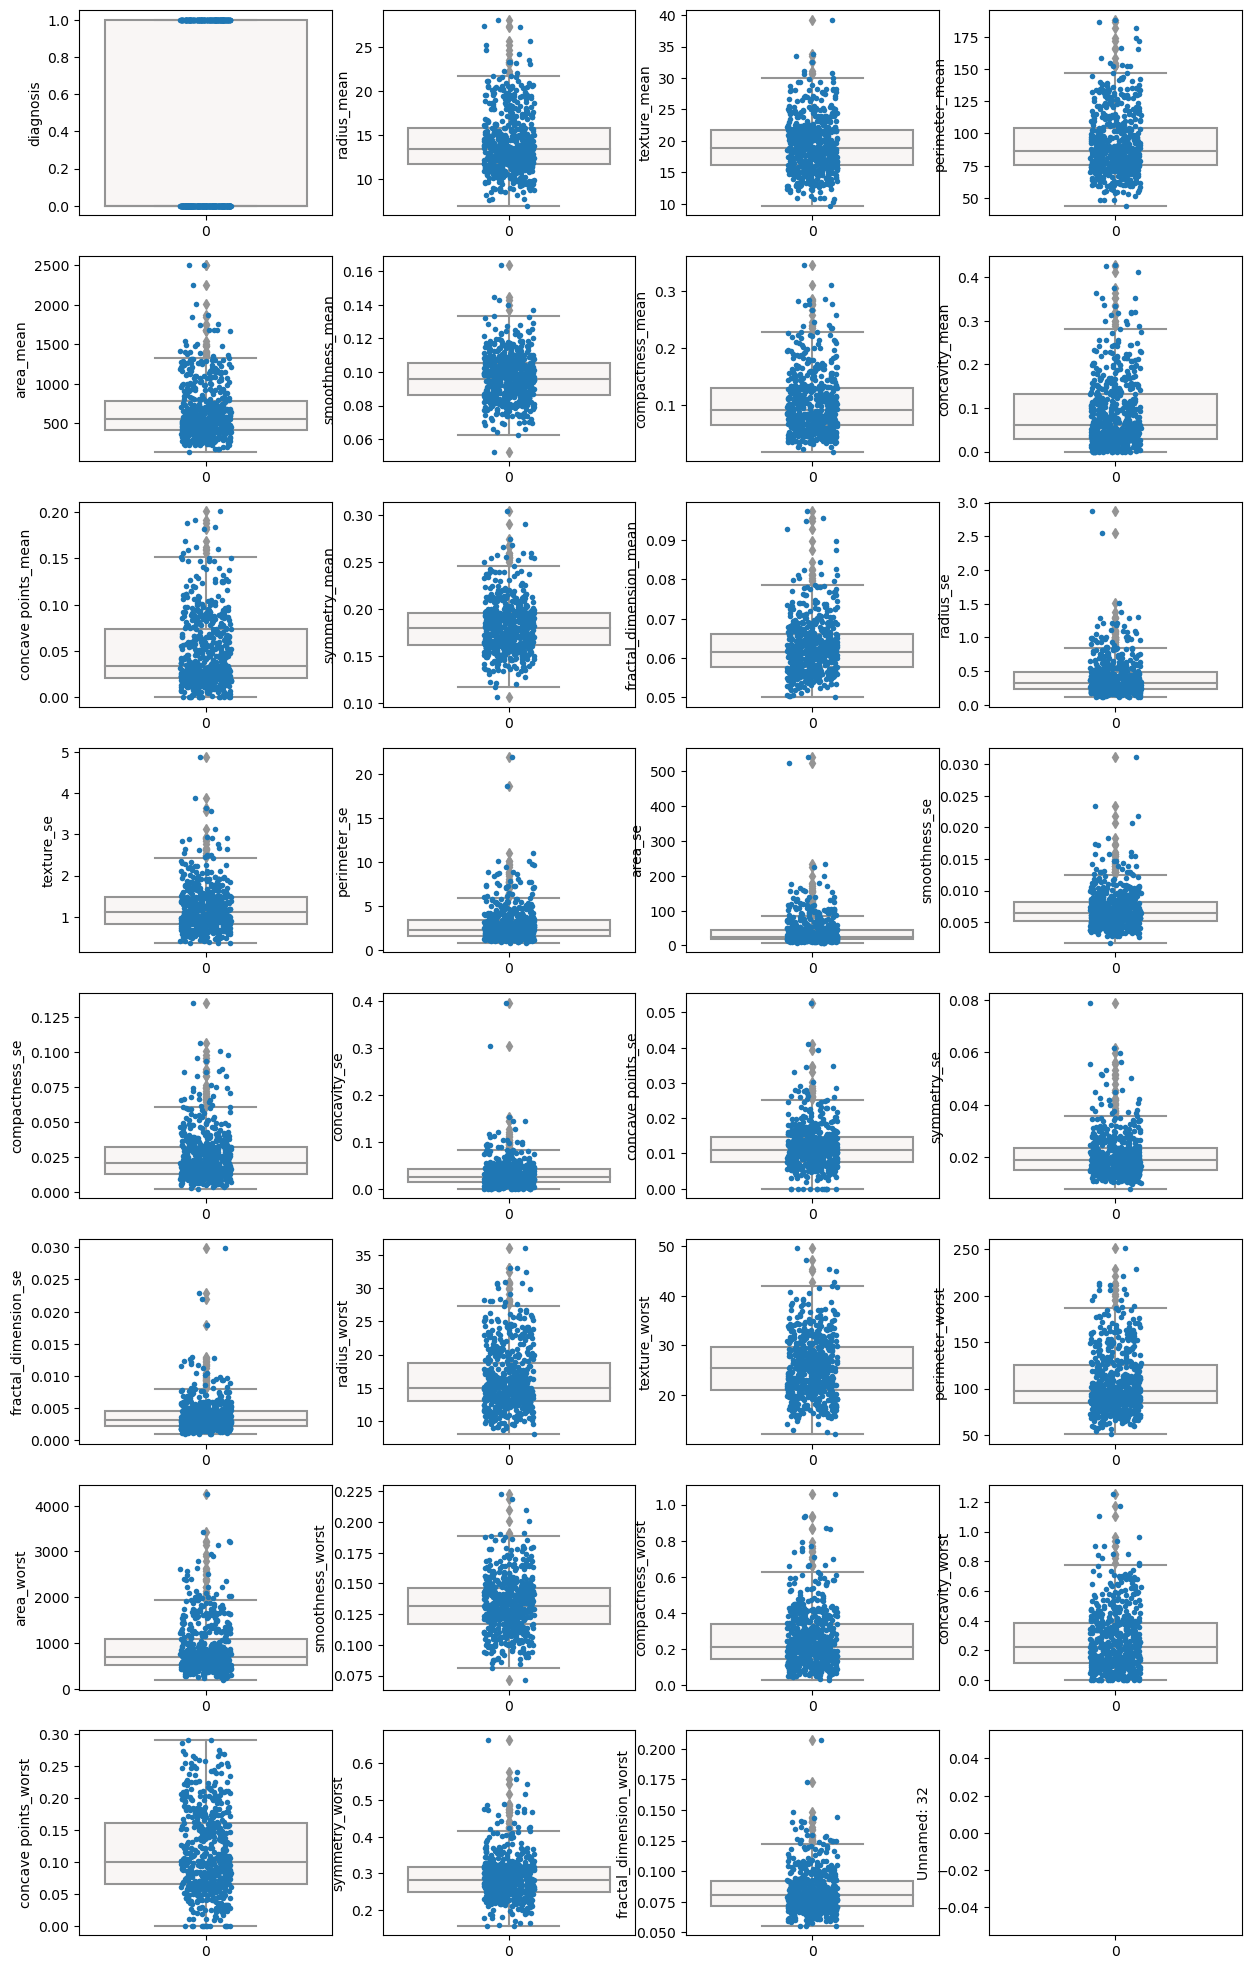

In [14]:
fig=plt.figure(figsize=(15,25))
rows=8
cols=4
for i,col in enumerate(data.columns):
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.boxplot(data[col],ax=ax,palette='vlag')
    sns.stripplot(data[col],ax=ax,size=4,linewidth=0)

<Axes: >

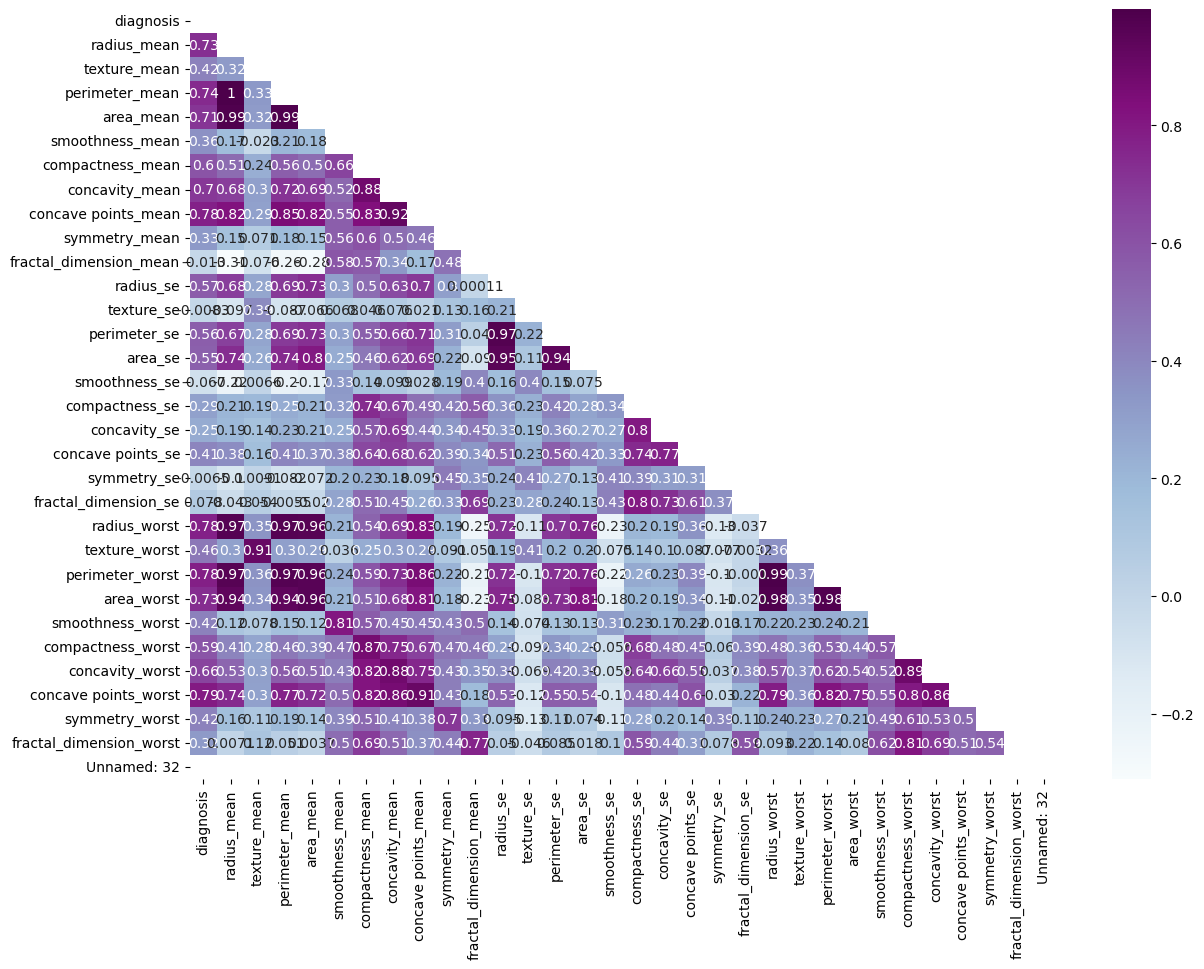

In [15]:
corr_matrix = data.corr()

ones_matrix = np.ones_like(corr_matrix, dtype=bool)

upper_tri = np.triu(ones_matrix)

plt.figure(figsize = (14,10))
sns.heatmap(corr_matrix, cmap='BuPu', annot=True, mask = upper_tri)

In [16]:
predictor_cols = [col for col in data.columns if col != 'diagnosis']

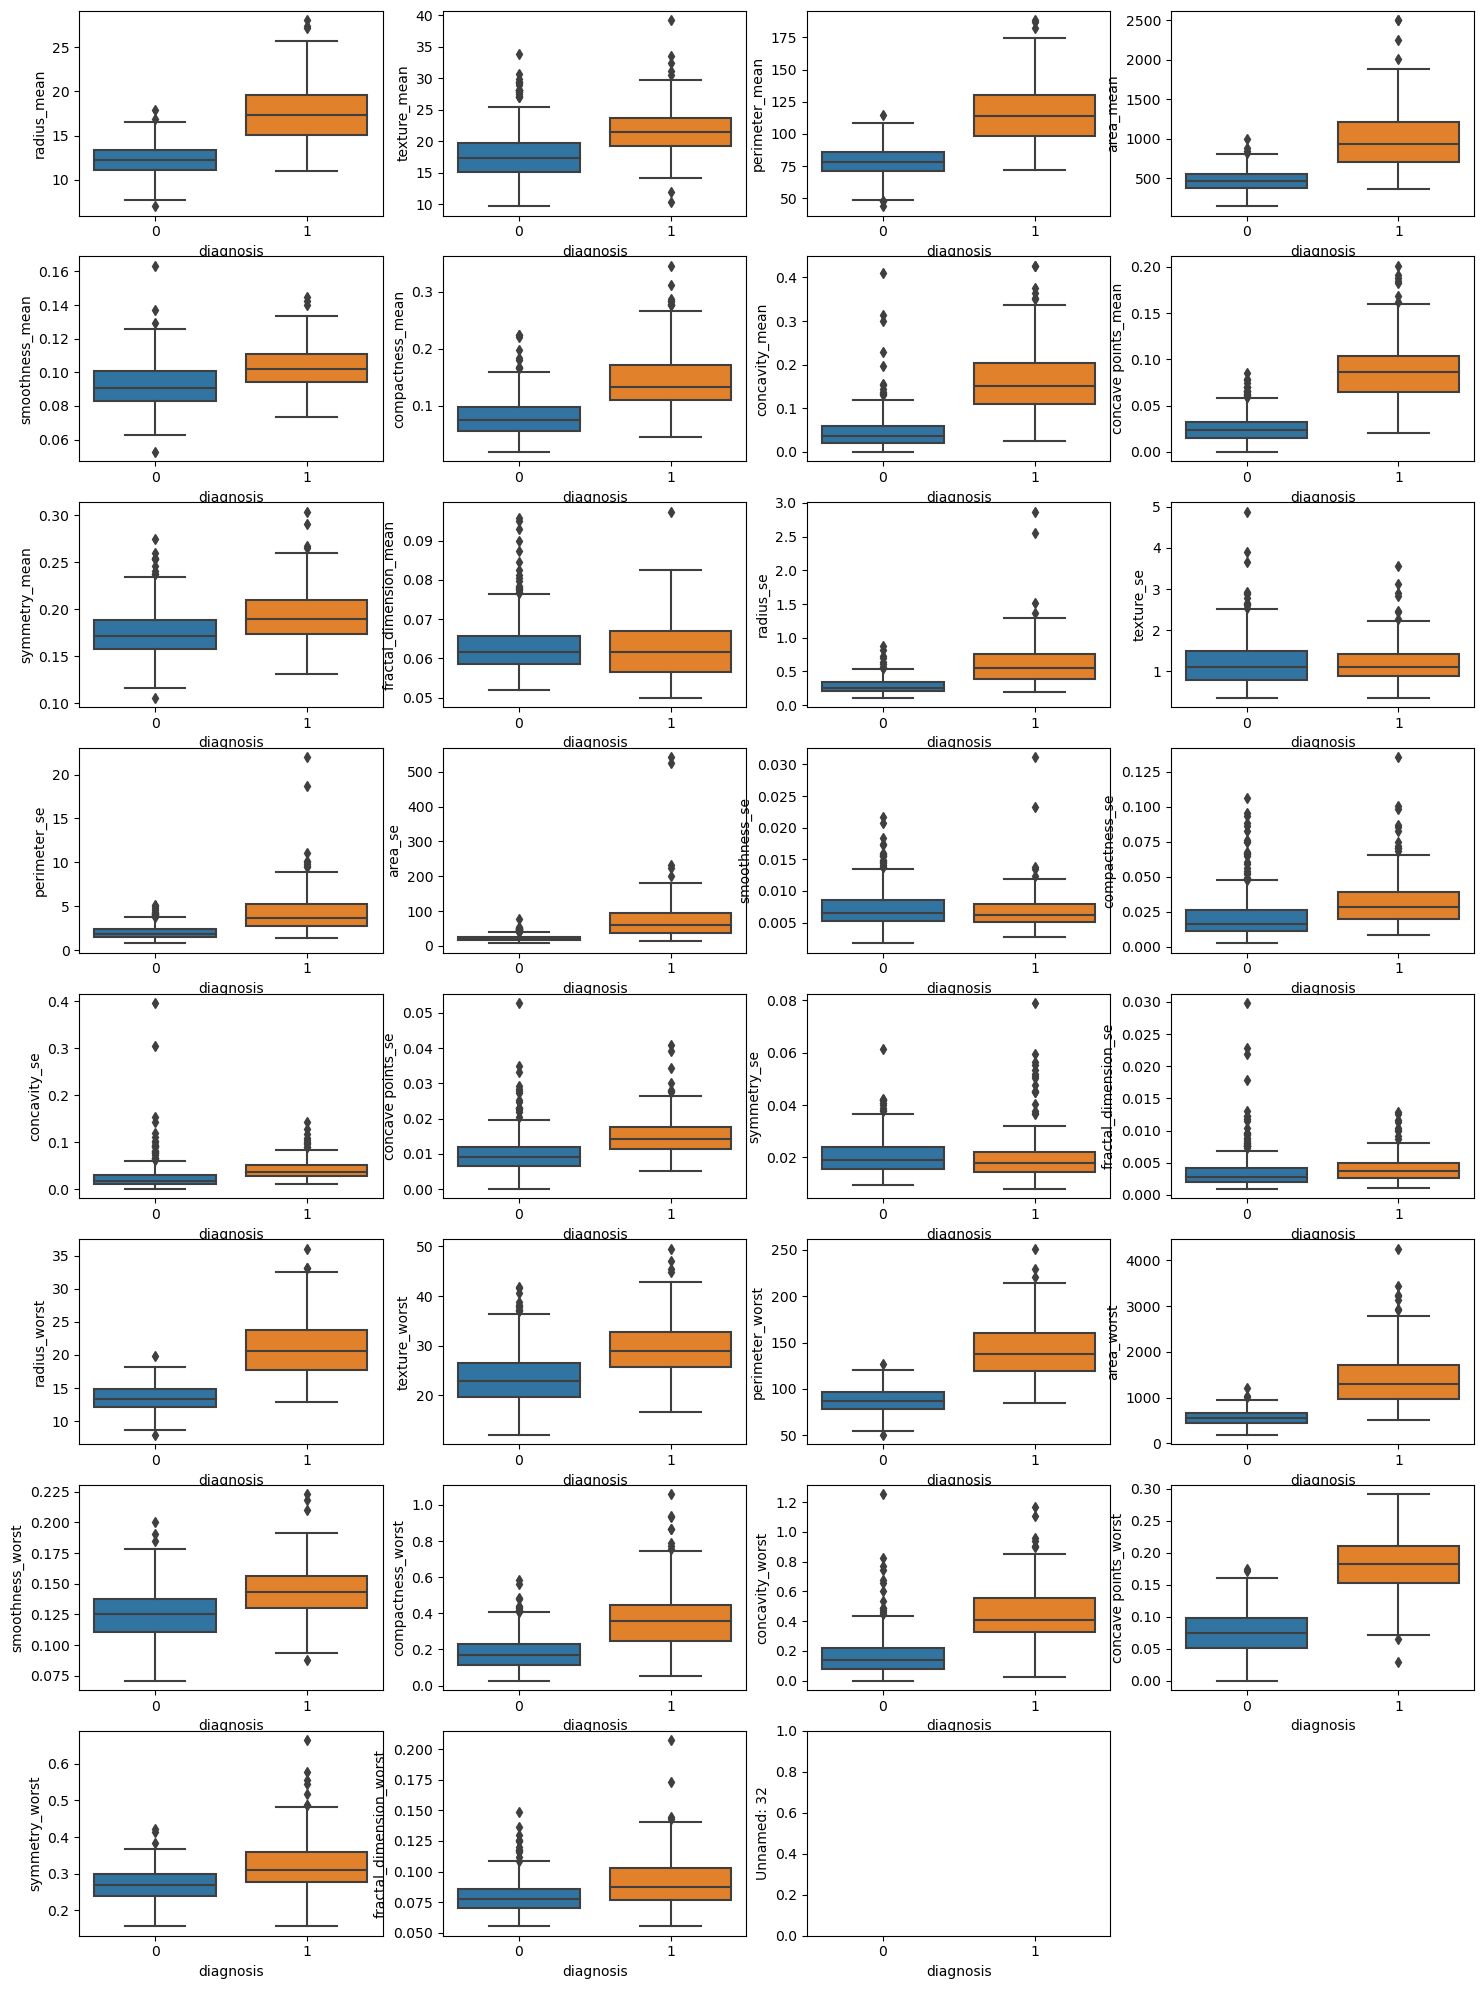

In [17]:
fig = plt.figure(figsize = (18,25))
rows = 8
cols = 4

for i, col in enumerate(predictor_cols):
    ax = fig.add_subplot(rows, cols, i+1)

    sns.boxplot(data = data, x = 'diagnosis', y = col, ax = ax)

C:\Users\User\AppData\Local\Temp\ipykernel_15508\2439919023.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, orientation='vertical', label='Correlation Coefficient')


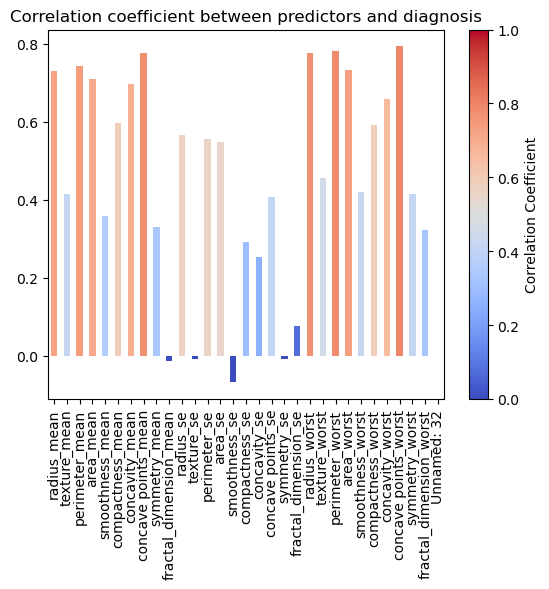

In [18]:
import matplotlib.cm as cm 

corr_values = corr_matrix.iloc[0,][1:]
colors = cm.coolwarm(corr_values)

corr_values.plot(kind='bar', color=colors)
plt.title('Correlation coefficient between predictors and diagnosis')

sm = cm.ScalarMappable(cmap=cm.coolwarm)
sm.set_array([])
plt.colorbar(sm, orientation='vertical', label='Correlation Coefficient')

plt.show()

In [19]:
print(corr_values[corr_values <0.2])
weak_predictors = corr_values[corr_values <0.2].index
print(weak_predictors)

fractal_dimension_mean   -0.012838
texture_se               -0.008303
smoothness_se            -0.067016
symmetry_se              -0.006522
fractal_dimension_se      0.077972
Name: diagnosis, dtype: float64
Index(['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')


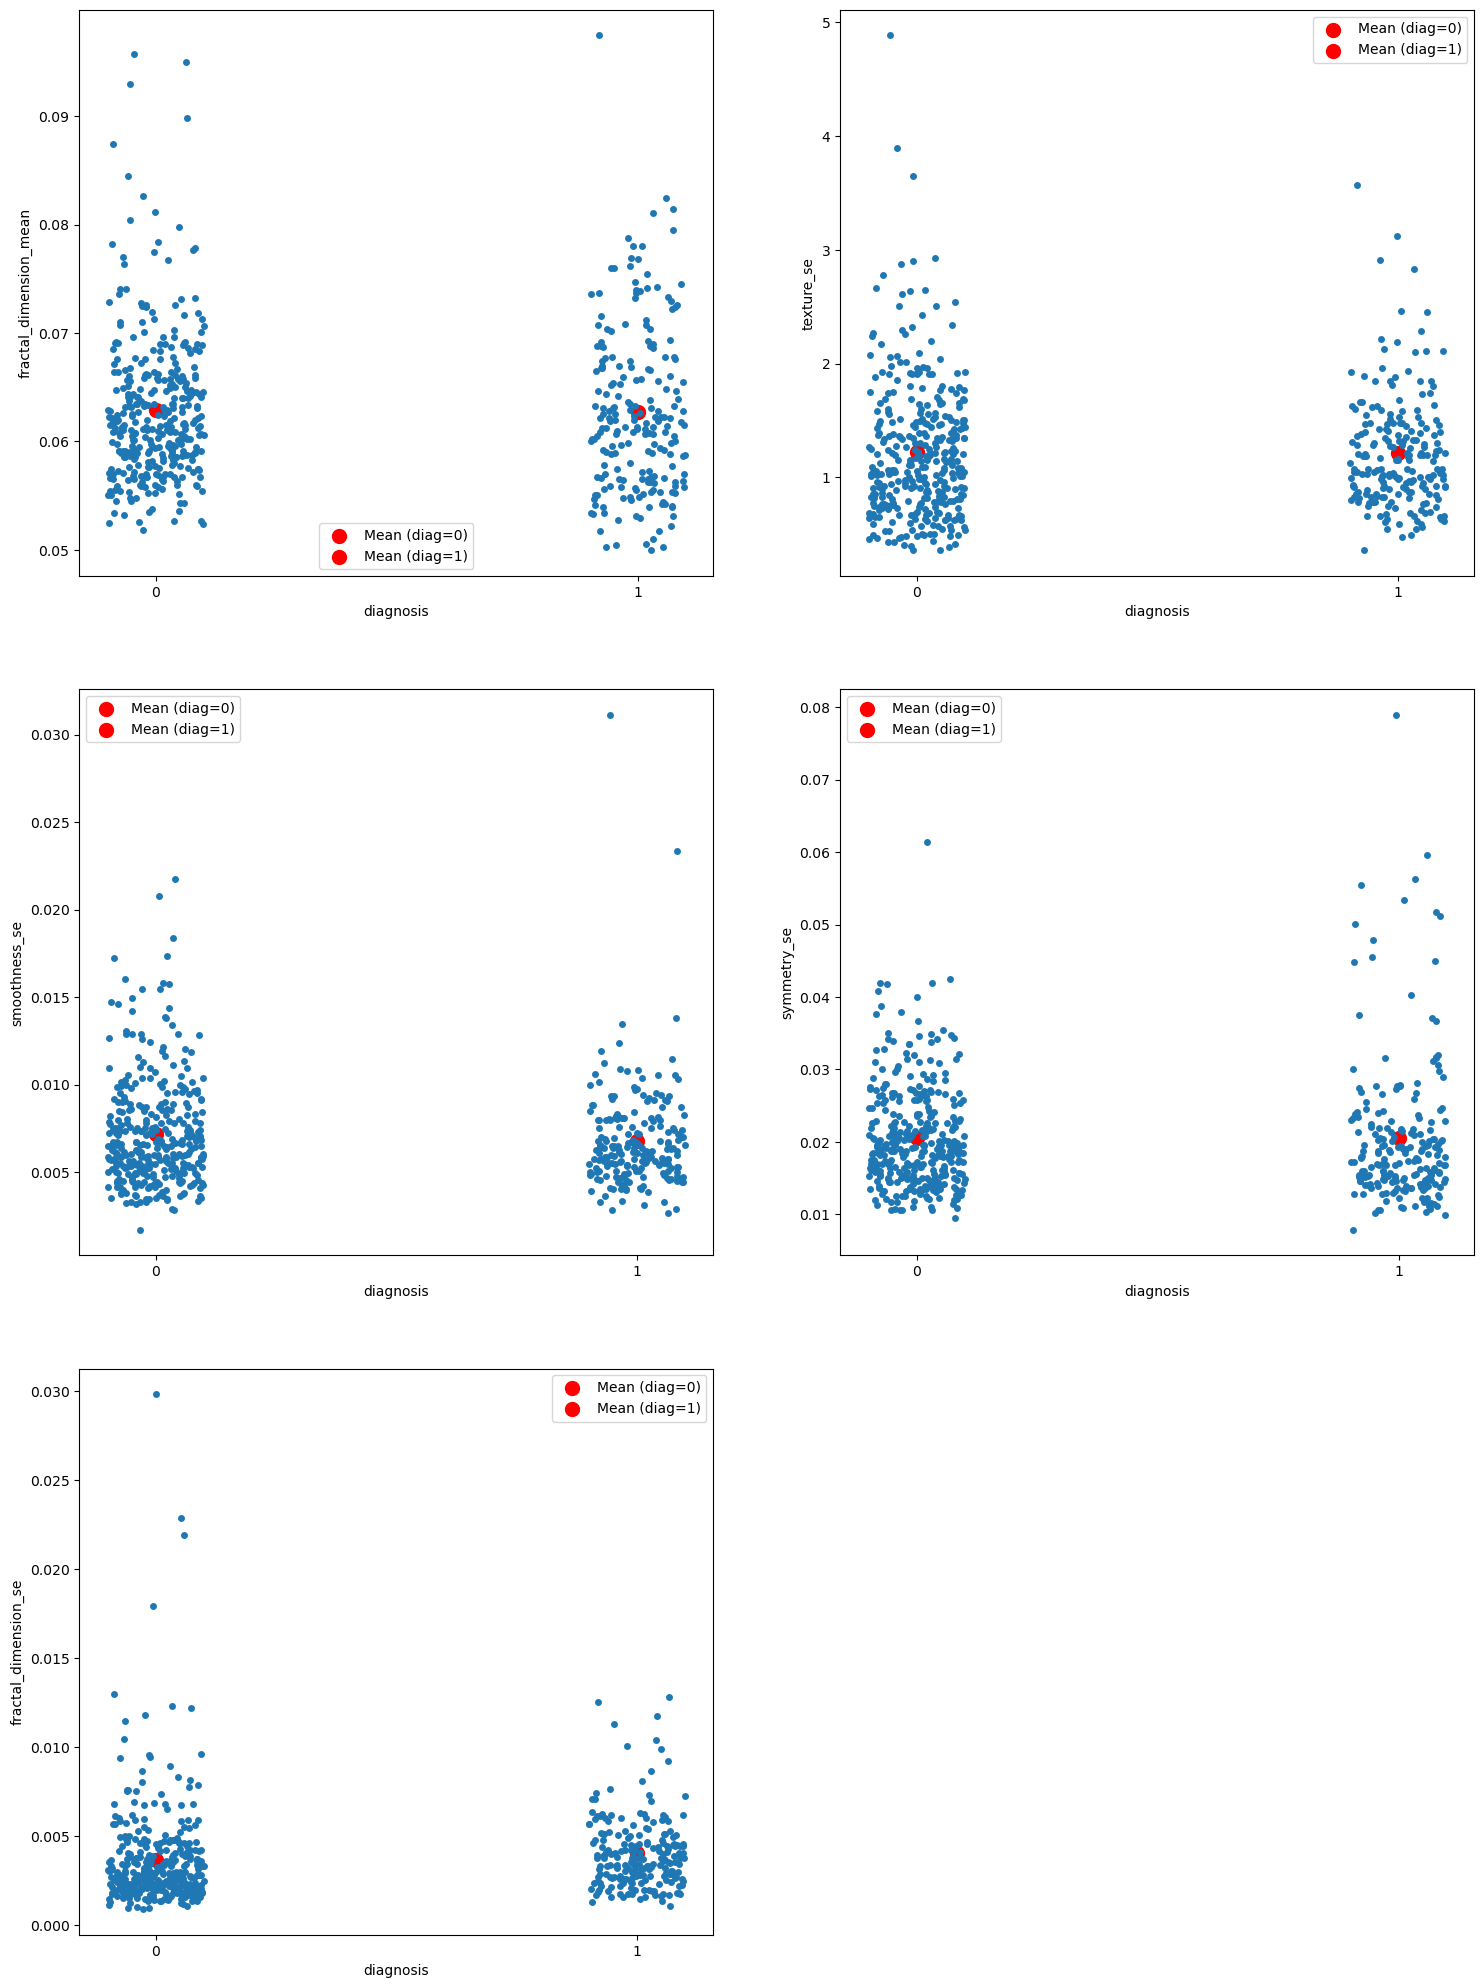

In [20]:
fig = plt.figure(figsize = (18,25))
rows = 3
cols = 2

for i,weak_pred in enumerate(weak_predictors):
    ax = fig.add_subplot(rows, cols, i+1)
    sns.stripplot(data = data, y = weak_pred, x = data.diagnosis, ax = ax)
     
    mean_0 = data[data.diagnosis == 0][weak_pred].mean()
    mean_1 = data[data.diagnosis == 1][weak_pred].mean()

    ax.scatter(x=[0], y=[mean_0], color='red', marker='o', s=100, label='Mean (diag=0)')
    ax.scatter(x=[1], y=[mean_1], color='red', marker='o', s=100, label='Mean (diag=1)')
    ax.legend(loc='best')

In [21]:
data.drop('Unnamed: 32', axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [23]:
data.mean().sort_values(ascending = False)

area_worst                 880.583128
area_mean                  654.889104
perimeter_worst            107.261213
perimeter_mean              91.969033
area_se                     40.337079
texture_worst               25.677223
texture_mean                19.289649
radius_worst                16.269190
radius_mean                 14.127292
perimeter_se                 2.866059
texture_se                   1.216853
radius_se                    0.405172
diagnosis                    0.372583
symmetry_worst               0.290076
concavity_worst              0.272188
compactness_worst            0.254265
symmetry_mean                0.181162
smoothness_worst             0.132369
concave points_worst         0.114606
compactness_mean             0.104341
smoothness_mean              0.096360
concavity_mean               0.088799
fractal_dimension_worst      0.083946
fractal_dimension_mean       0.062798
concave points_mean          0.048919
concavity_se                 0.031894
compactness_

In [24]:
data.std().sort_values(ascending =False)

area_worst                 569.356993
area_mean                  351.914129
area_se                     45.491006
perimeter_worst             33.602542
perimeter_mean              24.298981
texture_worst                6.146258
radius_worst                 4.833242
texture_mean                 4.301036
radius_mean                  3.524049
perimeter_se                 2.021855
texture_se                   0.551648
diagnosis                    0.483918
radius_se                    0.277313
concavity_worst              0.208624
compactness_worst            0.157336
concavity_mean               0.079720
concave points_worst         0.065732
symmetry_worst               0.061867
compactness_mean             0.052813
concave points_mean          0.038803
concavity_se                 0.030186
symmetry_mean                0.027414
smoothness_worst             0.022832
fractal_dimension_worst      0.018061
compactness_se               0.017908
smoothness_mean              0.014064
symmetry_se 

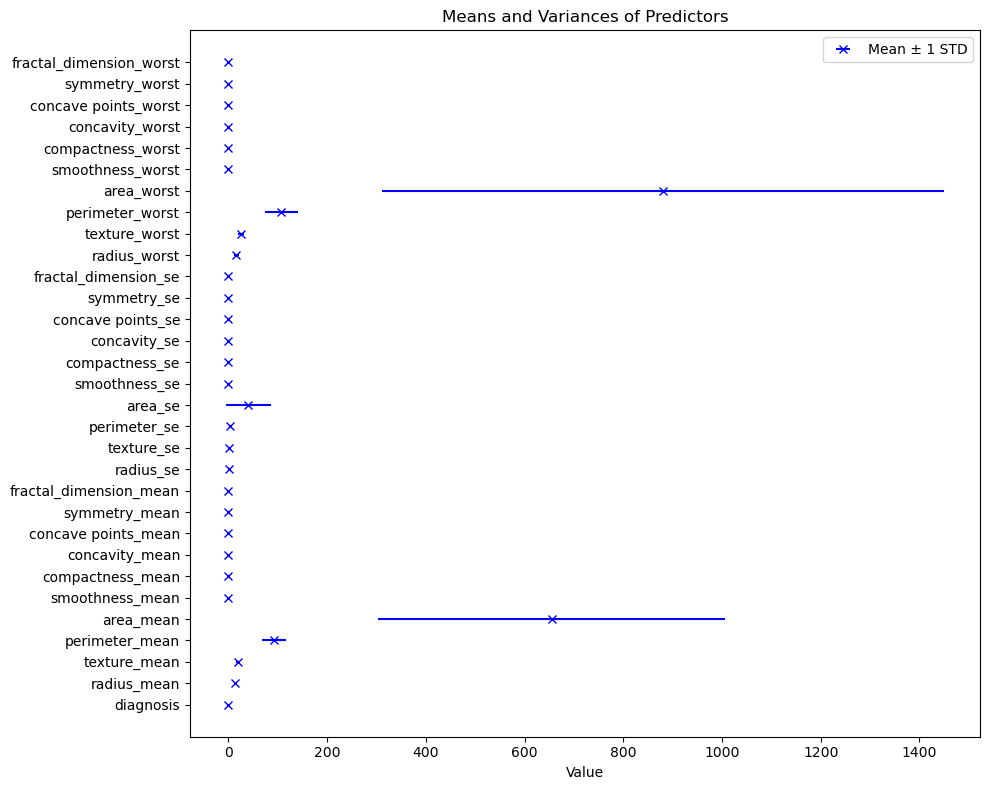

In [25]:
means = data.mean()
std_devs = data.std()

y = np.arange(len(means))

fig, ax = plt.subplots(figsize=(10, 8))

ax.errorbar(means, y, xerr=std_devs, fmt='x', label='Mean ± 1 STD', color = 'blue')

ax.set_yticks(y)
ax.set_yticklabels(means.index)

ax.set_xlabel('Value')
ax.set_title('Means and Variances of Predictors')
ax.legend()

plt.tight_layout()
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

predictors_subset = data.drop(columns = ['diagnosis'])
predictors_subset.columns

predictors_subset_scaled = scaler.fit_transform(predictors_subset)

In [28]:
print(predictors_subset_scaled.mean(axis = 0))
print(predictors_subset_scaled.std(axis = 0))

[-1.37363271e-16  6.86816353e-17 -1.24875700e-16 -2.18532476e-16
 -8.36667193e-16  1.87313551e-16  4.99502802e-17 -4.99502802e-17
  1.74825981e-16  4.74527662e-16  2.37263831e-16 -1.12388130e-16
 -1.12388130e-16 -1.31119486e-16 -1.52972733e-16  1.74825981e-16
  1.62338411e-16  0.00000000e+00  8.74129903e-17 -6.24378502e-18
 -8.24179623e-16  1.24875700e-17 -3.74627101e-16  0.00000000e+00
 -2.37263831e-16 -3.37164391e-16  7.49254203e-17  2.24776261e-16
  2.62238971e-16 -5.74428222e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [29]:
from sklearn.model_selection import train_test_split

X = predictors_subset_scaled
y = data.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
upper_tri_dummy = np.triu(np.ones(corr_matrix.shape), k =1)
upper_tri_bool = upper_tri_dummy.astype(bool)
upper_tri_corr_mat = corr_matrix.where(upper_tri_bool)

type(upper_tri_corr_mat.stack())
type(upper_tri_corr_mat.stack().values)
corr_coeff_values = upper_tri_corr_mat.stack().values

len(corr_coeff_values)

465

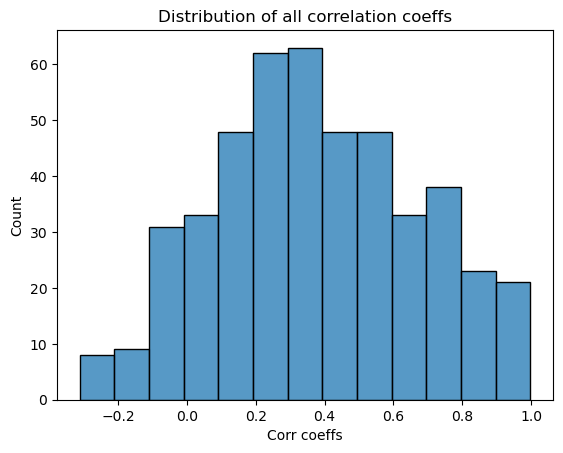

In [31]:
sns.histplot(corr_coeff_values)
plt.title('Distribution of all correlation coeffs')
plt.xlabel('Corr coeffs')
plt.show()

In [32]:
print('Prop of coeffs above .6 is ', round((np.sum(np.abs(corr_coeff_values) > 0.6)) / (len(corr_coeff_values)), 3))

Prop of coeffs above .6 is  0.245


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [34]:
vif_list = [vif(data.values, i) for i in range(len(data.columns))]
vif_predictors = data.columns

vif_df = pd.DataFrame({'Predictors': vif_predictors, 'VIF': vif_list})

print(vif_df.sort_values('VIF', ascending = False))

                 Predictors           VIF
1               radius_mean  63787.228031
3            perimeter_mean  58217.307016
21             radius_worst   9960.892269
23          perimeter_worst   4494.531141
4                 area_mean   1305.508785
24               area_worst   1164.089106
10   fractal_dimension_mean    654.870560
30  fractal_dimension_worst    427.226418
5           smoothness_mean    393.410071
25         smoothness_worst    375.598751
22            texture_worst    343.506199
2              texture_mean    251.122570
11                radius_se    237.352381
29           symmetry_worst    219.571466
13             perimeter_se    211.429834
6          compactness_mean    201.524726
9             symmetry_mean    184.542087
7            concavity_mean    158.130682
8       concave points_mean    154.891431
28     concave points_worst    148.765592
26        compactness_worst    132.894041
27          concavity_worst     86.721758
14                  area_se     72

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lasso_logistic_model = LogisticRegression(penalty = 'l1', solver='saga', max_iter = 10000)

lasso_log_params = {'C': np.logspace(-4,4,10)}

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
lasso_log_gridsearch = GridSearchCV(lasso_logistic_model, lasso_log_params, cv = 5)

lasso_log_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, penalty='l1',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])})

In [39]:
print("BEST VALUE OF C -------- \n", lasso_log_gridsearch.best_params_)
print("BEST (Train) SCORE/ CLASSIFICATION ACCURACY -------- \n", lasso_log_gridsearch.best_score_)

BEST VALUE OF C -------- 
 {'C': 2.782559402207126}
BEST (Train) SCORE/ CLASSIFICATION ACCURACY -------- 
 0.9780219780219781


In [40]:
lasso_log_best_model = lasso_log_gridsearch.best_estimator_ 
print(lasso_log_best_model)

LogisticRegression(C=2.782559402207126, max_iter=10000, penalty='l1',
                   solver='saga')


In [41]:
lasso_log_train_accuracy = lasso_log_best_model.score(X_train, y_train)
print(f"Train accuracy: {lasso_log_train_accuracy:.3f}")

lasso_log_test_accuracy = lasso_log_best_model.score(X_test, y_test)
print(f"Test accuracy: {lasso_log_test_accuracy:.3f} ")

Train accuracy: 0.989
Test accuracy: 0.965 


In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

lasso_log_test_pred = lasso_log_best_model.predict(X_test)

lasso_log_cm = confusion_matrix(y_test, lasso_log_test_pred)

print(lasso_log_cm)

[[77  1]
 [ 3 33]]


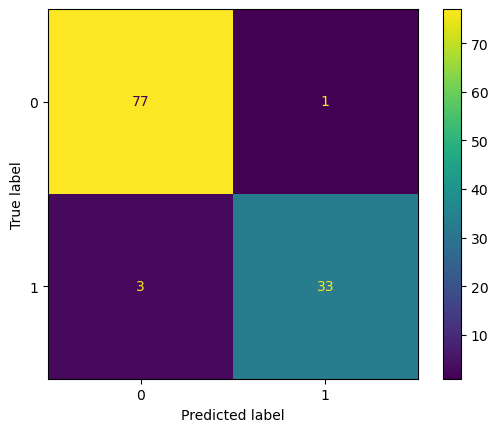

In [43]:
ConfusionMatrixDisplay(confusion_matrix= lasso_log_cm).plot()

In [44]:
lasso_coeffs = lasso_log_best_model.coef_
print(lasso_coeffs)

[[ 0.          0.          0.          0.          0.         -1.0400469
   0.          3.27569977  0.          0.          3.55899558  0.
   0.          0.          0.         -0.97877626 -0.40887042  0.
  -0.04559962 -1.64554613  2.35654897  1.72301091  0.29728086  1.57058612
   0.49161682  0.          2.11231154  1.15857309  0.77373645  1.02847051]]


In [45]:
lasso_coeff_list = lasso_coeffs[0] 

lasso_coeff_df = pd.DataFrame({'Preds': predictors_subset.columns, 'Lasso_coeffs': lasso_coeff_list})

In [46]:
print(lasso_coeff_df.sort_values(('Lasso_coeffs'), ascending = False))

                      Preds  Lasso_coeffs
10                radius_se      3.558996
7       concave points_mean      3.275700
20             radius_worst      2.356549
26          concavity_worst      2.112312
21            texture_worst      1.723011
23               area_worst      1.570586
27     concave points_worst      1.158573
29  fractal_dimension_worst      1.028471
28           symmetry_worst      0.773736
24         smoothness_worst      0.491617
22          perimeter_worst      0.297281
1              texture_mean      0.000000
25        compactness_worst      0.000000
17        concave points_se      0.000000
0               radius_mean      0.000000
14            smoothness_se      0.000000
13                  area_se      0.000000
12             perimeter_se      0.000000
11               texture_se      0.000000
9    fractal_dimension_mean      0.000000
8             symmetry_mean      0.000000
6            concavity_mean      0.000000
4           smoothness_mean      0

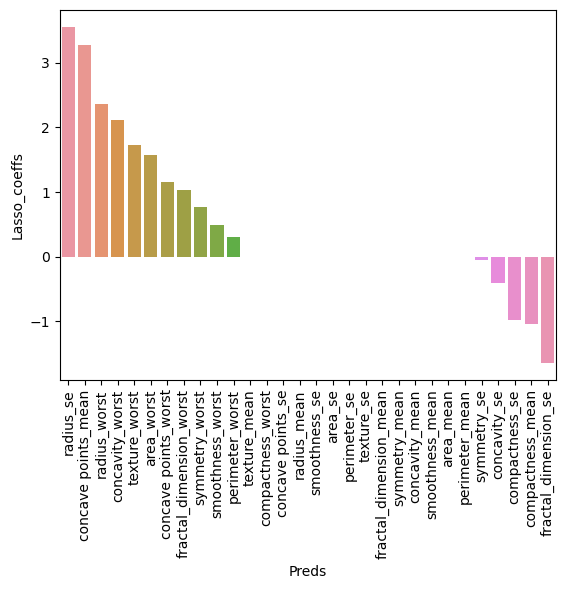

In [47]:
sns.barplot(data = lasso_coeff_df.sort_values(by = 'Lasso_coeffs', ascending = False), x = 'Preds', y = 'Lasso_coeffs')
plt.xticks(rotation = 90)
plt.show()

In [48]:
vif_df
vif_without_outcome = vif_df[vif_df['Predictors'] != 'diagnosis']
print(vif_without_outcome.Predictors.tolist())

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [49]:
predictors_df = vif_df.merge(lasso_coeff_df, left_on = 'Predictors', right_on= 'Preds')
 
print(predictors_df.head())

predictors_df = predictors_df.drop(columns = ['Preds'])

print(predictors_df.head())

        Predictors           VIF            Preds  Lasso_coeffs
0      radius_mean  63787.228031      radius_mean           0.0
1     texture_mean    251.122570     texture_mean           0.0
2   perimeter_mean  58217.307016   perimeter_mean           0.0
3        area_mean   1305.508785        area_mean           0.0
4  smoothness_mean    393.410071  smoothness_mean           0.0
        Predictors           VIF  Lasso_coeffs
0      radius_mean  63787.228031           0.0
1     texture_mean    251.122570           0.0
2   perimeter_mean  58217.307016           0.0
3        area_mean   1305.508785           0.0
4  smoothness_mean    393.410071           0.0


In [50]:
predictors_df.sort_values(['Lasso_coeffs', 'VIF'])

,Predictors,VIF,Lasso_coeffs
19,fractal_dimension_se,27.556836,-1.645546
5,compactness_mean,201.524726,-1.040047
15,compactness_se,44.979263,-0.978776
16,concavity_se,33.676991,-0.408870
18,symmetry_se,37.194742,-0.045600
11,texture_se,24.675389,0.000000
14,smoothness_se,26.395387,0.000000
17,concave points_se,54.072023,0.000000
13,area_se,72.669276,0.000000
25,compactness_worst,132.894041,0.000000


In [51]:
predictors_df['Lasso_selected'] = (predictors_df.Lasso_coeffs > 0).astype('int')

predictors_df.Lasso_selected.value_counts()

0    19
1    11
Name: Lasso_selected, dtype: int64

In [52]:
predictors_df.groupby('Lasso_selected')['VIF'].mean()

Lasso_selected
0    6622.062543
1    1601.195137
Name: VIF, dtype: float64

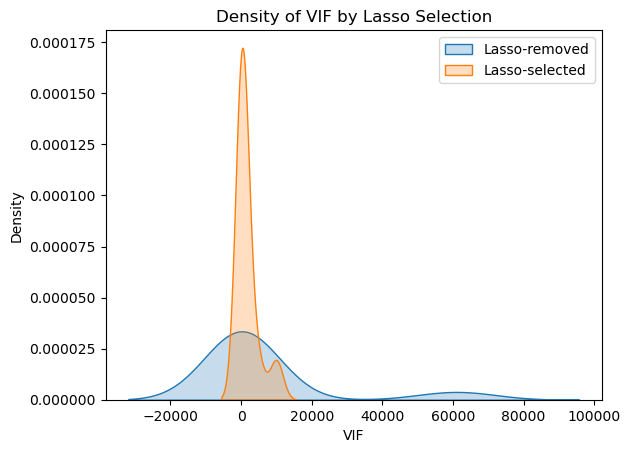

In [53]:
group_0 = predictors_df[predictors_df['Lasso_selected'] == 0]['VIF']
group_1 = predictors_df[predictors_df['Lasso_selected'] == 1]['VIF']

sns.kdeplot(group_0, label='Lasso-removed', fill=True)
sns.kdeplot(group_1, label='Lasso-selected', fill=True)

plt.title('Density of VIF by Lasso Selection')
plt.xlabel('VIF')
plt.ylabel('Density')
plt.legend()
plt.show()

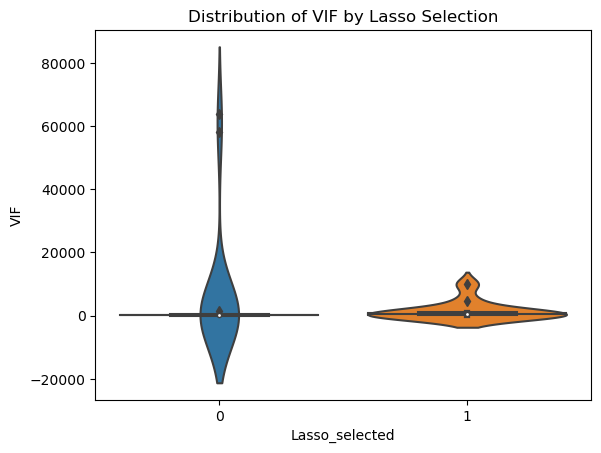

In [54]:
sns.violinplot(x='Lasso_selected', y='VIF', data=predictors_df)
sns.boxplot(x='Lasso_selected', y='VIF', data=predictors_df)
plt.title('Distribution of VIF by Lasso Selection')
plt.show()

In [55]:
predictors_df[['Aspect', 'Metric']] = predictors_df.Predictors.str.rsplit("_", n = 1, expand = True) 

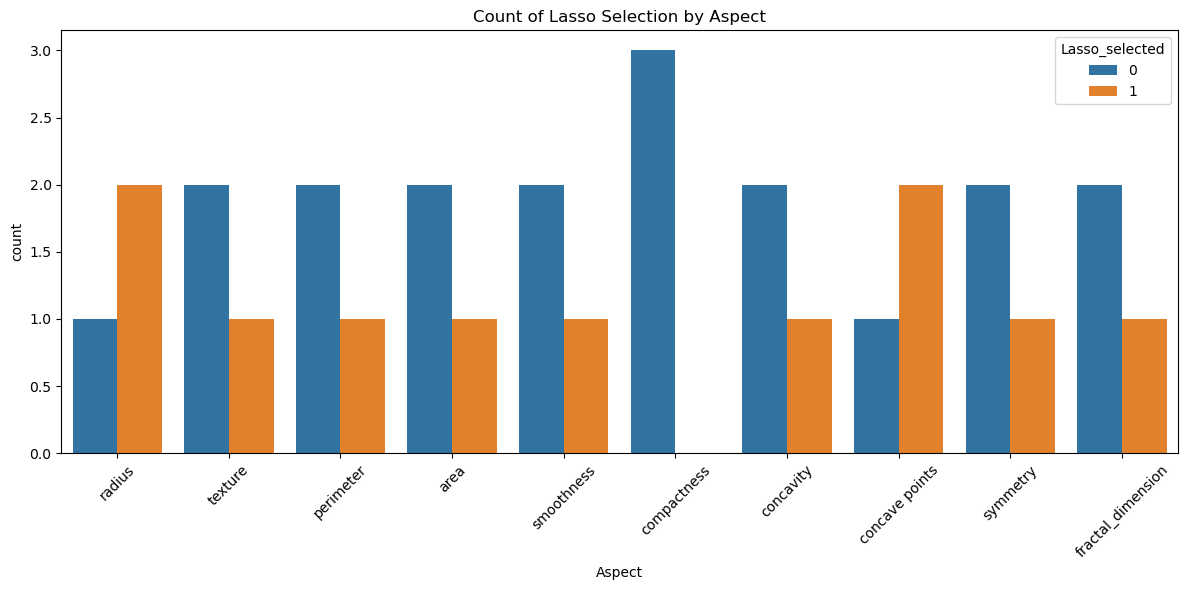

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(data=predictors_df, x='Aspect', hue='Lasso_selected')
plt.title('Count of Lasso Selection by Aspect')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

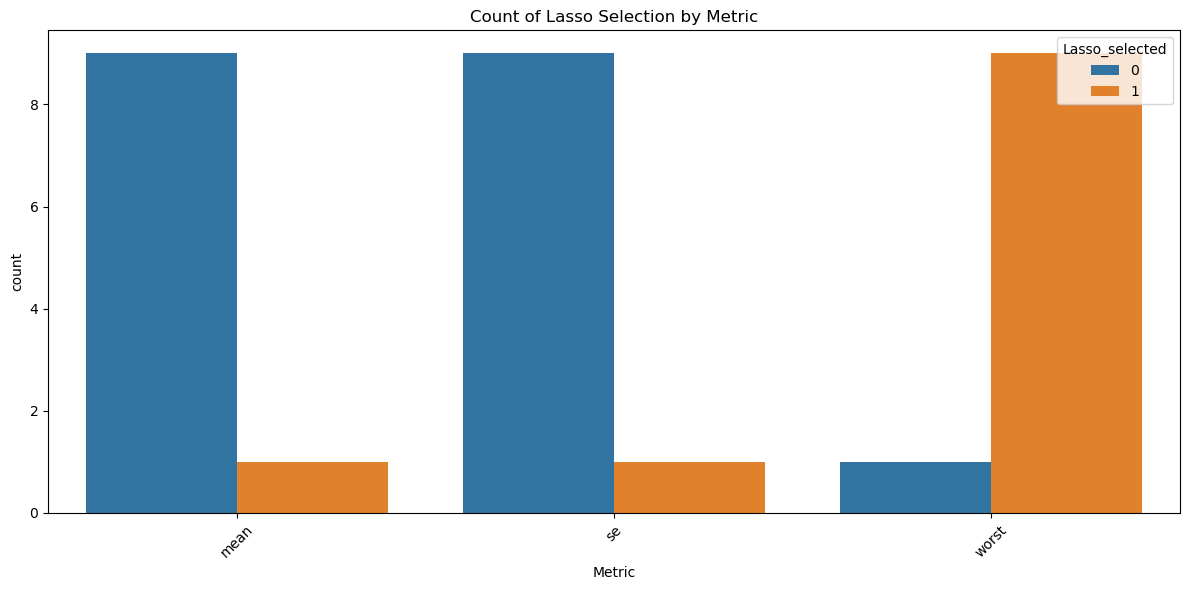

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(data=predictors_df, x='Metric', hue='Lasso_selected')
plt.title('Count of Lasso Selection by Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()